<a href="https://colab.research.google.com/github/daniahqaddomi/daniahqaddomi/blob/main/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

amazon_reviews = pd.read_csv('https://media.githubusercontent.com/media/juliandariomirandacalle/NLP_Notebooks/master/01-Introduction_NLP/Customer_Reviews.csv')

In [ ]:
amazon_reviews.head(3)


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


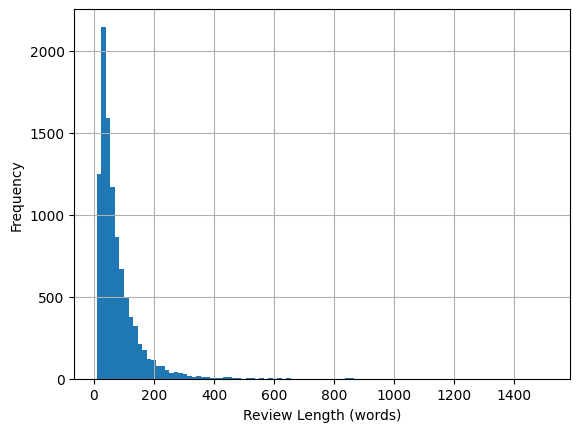

In [ ]:
words_per_review = amazon_reviews.Text.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 77.9028
Skewness: 4.612459483340116


In [ ]:
percent_val = 100 * amazon_reviews['Score'].value_counts()/len(amazon_reviews)
percent_val

Score
5    61.83
4    14.33
1     9.32
3     8.62
2     5.90
Name: count, dtype: float64

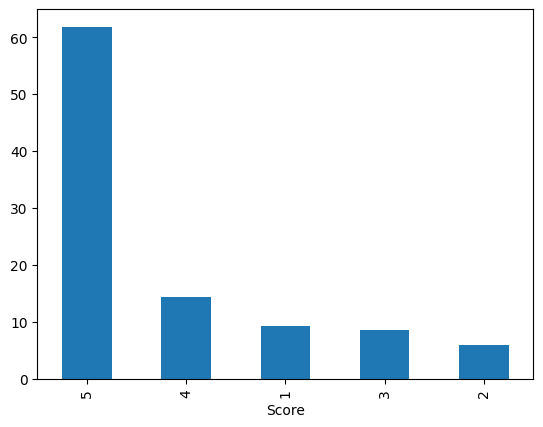

In [ ]:
percent_val.plot.bar()
plt.show()

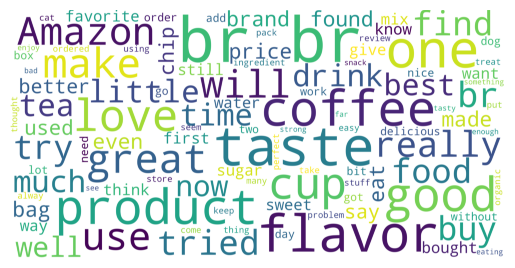

In [ ]:
word_cloud_text = ''.join(amazon_reviews['Text'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud,
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

In [ ]:
amazon_reviews.isnull().value_counts()

ProductId  UserId  ProfileName  HelpfulnessNumerator  HelpfulnessDenominator  Score  Time   Summary  Text 
False      False   False        False                 False                   False  False  False    False    10000
Name: count, dtype: int64

In [ ]:
# Mapping the ratings
amazon_reviews['Sentiment_rating'] = np.where(amazon_reviews.Score > 3,1,0)

## Removing neutral reviews
amazon_reviews = amazon_reviews[amazon_reviews.Score != 3]

# Printing the counts of each class
amazon_reviews['Sentiment_rating'].value_counts()

Sentiment_rating
1    7616
0    1522
Name: count, dtype: int64

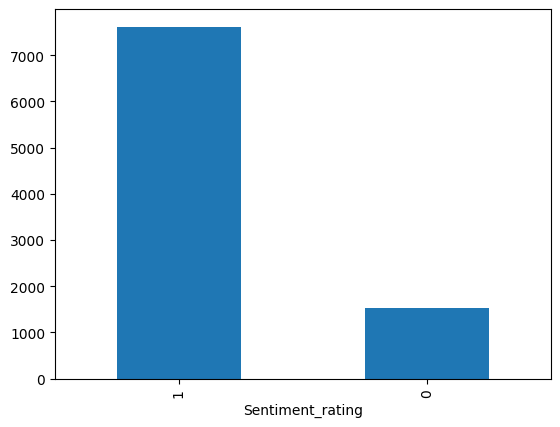

In [ ]:
amazon_reviews.Sentiment_rating.value_counts().plot.bar()
plt.show()

In [ ]:
amazon_reviews['reviews_text_new'] = amazon_reviews['Text'].str.lower()

In [ ]:
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
token_lists = [word_tokenize(each) for each in amazon_reviews['Text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

# For reviews converted to lowe case
token_lists_lower = [word_tokenize(each) for each in amazon_reviews['reviews_text_new']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

In [ ]:
review_backup = amazon_reviews['reviews_text_new'].copy()
amazon_reviews['reviews_text_new'] = amazon_reviews['reviews_text_new'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

In [ ]:
print("- Old Review -")
print(review_backup.values[10])
print("\n- New Review -")
print(amazon_reviews['reviews_text_new'][10])

- Old Review -
i don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  we picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  when we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />if you love hot sauce..i mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of tequila picante gourmet de inclan.  just realize that once you taste it, you will never want to use any other sauce.<br /><br />thank you for the personal, incredible service!

- New Review -
i don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  we picked up a bottle once on a trip

Number of unique tokens then:  27509
Number of unique tokens now:  22473


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print('Available languages for NLTK v.3.4.5: ')
print(stopwords.fileids())


Available languages for NLTK v.3.4.5: 
['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
noise_words = []
eng_stop_words = stopwords.words('english')

In [ ]:
stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []
sentence = amazon_reviews['reviews_text_new'][0]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', without_stop_words)

-- Original Sentence --
 i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.

-- Stopwords in the sentence --
 ['i', 'have', 'of', 'the', 'and', 'have', 'them', 'all', 'to', 'be', 'of', 'the', 'more', 'a', 'than', 'a', 'and', 'it', 'my', 'is', 'and', 'she', 'this', 'than', 'most']

-- Non-stopwords in the sentence --
 ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', '.', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', '.', 'labrador', 'finicky', 'appreciates', 'product', 'better', '.']


In [ ]:
def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

amazon_reviews['reviews_text_nonstop'] = amazon_reviews['reviews_text_new'].apply(lambda row: stopwords_removal(stop_words, row))
amazon_reviews[['reviews_text_new','reviews_text_nonstop']]

,reviews_text_new,reviews_text_nonstop
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,this is a confection that has been around a fe...,"[confection, around, centuries, ., light, ,, p..."
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
4,great taffy at a great price. there was a wid...,"[great, taffy, great, price, ., wide, assortme..."
...,...,...
9995,we switched from the advance similac to the or...,"[switched, advance, similac, organic, product,..."
9996,"like the bad reviews say, the organic formula ...","[like, bad, reviews, say, ,, organic, formula,..."
9997,i wanted to solely breastfeed but was unable t...,"[wanted, solely, breastfeed, unable, keep, sup..."
9998,i love the fact that i can get this delieved t...,"[love, fact, get, delieved, house, delievy, ch..."


In [ ]:
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

PS = PorterStemmer()
LN = LancasterStemmer()
lemm = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def stemm_terms(row):
    return [LN.stem(term) for term in row]
def lemmatize_terms(row):
    return [lemm.lemmatize(term) for term in row]

amazon_reviews['reviews_text_stemm'] = amazon_reviews['reviews_text_nonstop'].apply(lambda row: stemm_terms(row))
amazon_reviews['reviews_text_lemm'] = amazon_reviews['reviews_text_nonstop'].apply(lambda row: lemmatize_terms(row))
amazon_reviews[['reviews_text_nonstop','reviews_text_stemm','reviews_text_lemm']]

,reviews_text_nonstop,reviews_text_stemm,reviews_text_lemm
0,"[bought, several, vitality, canned, dog, food,...","[bought, sev, vit, can, dog, food, produc, fou...","[bought, several, vitality, canned, dog, food,..."
1,"[product, arrived, labeled, jumbo, salted, pea...","[produc, ar, label, jumbo, salt, peanut, ..., ...","[product, arrived, labeled, jumbo, salted, pea..."
2,"[confection, around, centuries, ., light, ,, p...","[confect, around, century, ., light, ,, pillow...","[confection, around, century, ., light, ,, pil..."
3,"[looking, secret, ingredient, robitussin, beli...","[look, secret, ingredy, robitussin, believ, fo...","[looking, secret, ingredient, robitussin, beli..."
4,"[great, taffy, great, price, ., wide, assortme...","[gre, taffy, gre, pric, ., wid, assort, yummy,...","[great, taffy, great, price, ., wide, assortme..."
...,...,...,...
9995,"[switched, advance, similac, organic, product,...","[switch, adv, similac, org, produc, think, wou...","[switched, advance, similac, organic, product,..."
9996,"[like, bad, reviews, say, ,, organic, formula,...","[lik, bad, review, say, ,, org, formul, consti...","[like, bad, review, say, ,, organic, formula, ..."
9997,"[wanted, solely, breastfeed, unable, keep, sup...","[want, sol, breastfee, un, keep, suppl, formul...","[wanted, solely, breastfeed, unable, keep, sup..."
9998,"[love, fact, get, delieved, house, delievy, ch...","[lov, fact, get, deliev, hous, delievy, charge...","[love, fact, get, delieved, house, delievy, ch..."


,Text,Score,Sentiment_rating
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


In [ ]:
# prompt: write the code before and after applying LancasterStemmer and WordNetLemmatizer for the same text

# Before applying LancasterStemmer and WordNetLemmatizer
print('Original Text: ', amazon_reviews['Text'].iloc[0])
print('After stopwords: ', amazon_reviews['reviews_text_nonstop'].iloc[0])

# After applying LancasterStemmer and WordNetLemmatizer
print('After LancasterStemmer: ', amazon_reviews['reviews_text_stemm'].iloc[0])
print('After WordNetLemmatizer: ', amazon_reviews['reviews_text_lemm'].iloc[0])


Original Text:  I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
After stopwords:  ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', '.', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', '.', 'labrador', 'finicky', 'appreciates', 'product', 'better', '.']
After LancasterStemmer:  ['bought', 'sev', 'vit', 'can', 'dog', 'food', 'produc', 'found', 'good', 'qual', '.', 'produc', 'look', 'lik', 'stew', 'process', 'meat', 'smel', 'bet', '.', 'labrad', 'finicky', 'apprecy', 'produc', 'bet', '.']
After WordNetLemmatizer:  ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'product', 'found', 'good', 'quality', '.', 'product', 'look', 'like', 'stew', 'processed', 'meat', 'smell', 'better', '.', 'labr

In [ ]:

# Before applying LancasterStemmer and WordNetLemmatizer
original_text_size = sum(len(word) for word in amazon_reviews['Text'])

# After applying LancasterStemmer and WordNetLemmatizer
stemmed_text_size = sum(len(word) for word in amazon_reviews['reviews_text_stemm'].apply(lambda x: ' '.join(x)))
lemmatized_text_size = sum(len(word) for word in amazon_reviews['reviews_text_lemm'].apply(lambda x: ' '.join(x)))

print('Original text size:', original_text_size)
print('Stemmed text size:', stemmed_text_size)
print('Lemmatized text size:', lemmatized_text_size)


Original text size: 3730481
Stemmed text size: 2171127
Lemmatized text size: 2557704


In [ ]:
from nltk import ngrams

sentence = 'A bird in the hand worths two in the bush'

for n in range(1, 6):
    print(str(n) + '-grams:\n', list(ngrams(sentence.split(), n)))

1-grams:
 [('A',), ('bird',), ('in',), ('the',), ('hand',), ('worths',), ('two',), ('in',), ('the',), ('bush',)]
2-grams:
 [('A', 'bird'), ('bird', 'in'), ('in', 'the'), ('the', 'hand'), ('hand', 'worths'), ('worths', 'two'), ('two', 'in'), ('in', 'the'), ('the', 'bush')]
3-grams:
 [('A', 'bird', 'in'), ('bird', 'in', 'the'), ('in', 'the', 'hand'), ('the', 'hand', 'worths'), ('hand', 'worths', 'two'), ('worths', 'two', 'in'), ('two', 'in', 'the'), ('in', 'the', 'bush')]
4-grams:
 [('A', 'bird', 'in', 'the'), ('bird', 'in', 'the', 'hand'), ('in', 'the', 'hand', 'worths'), ('the', 'hand', 'worths', 'two'), ('hand', 'worths', 'two', 'in'), ('worths', 'two', 'in', 'the'), ('two', 'in', 'the', 'bush')]
5-grams:
 [('A', 'bird', 'in', 'the', 'hand'), ('bird', 'in', 'the', 'hand', 'worths'), ('in', 'the', 'hand', 'worths', 'two'), ('the', 'hand', 'worths', 'two', 'in'), ('hand', 'worths', 'two', 'in', 'the'), ('worths', 'two', 'in', 'the', 'bush')]


In [ ]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(amazon_reviews['reviews_text_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())
df.head()

,00,000,0003,000kwh,002,008,0100,0174,02,03,...,zon,zoo,zoom,zotz,zucchini,zuke,zukes,zupas,zuppa,ît
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             stop_words=noise_words, # List of stopwords
                             ngram_range=(1,1)) # number of n-grams

bow_data = bow_counts.fit_transform(amazon_reviews['reviews_text_new'])

In [ ]:
bow_data

<9138x22473 sparse matrix of type '<class 'numpy.int64'>'
	with 527075 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    amazon_reviews['Sentiment_rating'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random state for replication purposes

In [ ]:
y_test_bow.value_counts()/y_test_bow.shape[0]


Sentiment_rating
1    0.847921
0    0.152079
Name: count, dtype: float64

In [ ]:
### Training the model
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction

## Calculate key performance metrics
print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.9556052379431491


In [ ]:
### Changes with respect to the previous code
### 1. Increasing the n-grams from just having 1-gram to (1-gram, 2-gram, 3-gram, and 4-gram)
### 2. Including the stopwords in the bag of words features

bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,4))

bow_data = bow_counts.fit_transform(amazon_reviews.reviews_text_new)

In [ ]:
# Notice the increase in features with inclusion of n-grams
bow_data

<9138x1333543 sparse matrix of type '<class 'numpy.int64'>'
	with 2822625 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    amazon_reviews['Sentiment_rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 0)

In [ ]:
# Defining and training the model
lr_model_all_new = LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))

F1 score:  0.9555694618272841


In [ ]:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names_out(), # ge tall the n-gram feature names
                                   lr_model_all_new.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

lr_weights.sort_values(['weights'], ascending = False)[:15] # top-15 more important features for positive reviews

,words,weights
551761,great,1.254371
414288,delicious,0.827080
542653,good,0.791909
910937,perfect,0.790288
1102317,the best,0.782557
464843,excellent,0.760037
737995,love,0.753366
811978,nice,0.738463
295800,best,0.736507
741249,loves,0.593264


In [ ]:
lr_weights.sort_values(['weights'], ascending = False)[-15:] # top-15 more important features for negative reviews


,words,weights
270764,awful,-0.524283
1045922,stick,-0.529432
1314151,worst,-0.537211
425346,disappointing,-0.537324
269869,away,-0.539688
1266852,waste,-0.549198
1278879,were,-0.559525
798325,n't,-0.644394
273091,bad,-0.650445
1274374,weak,-0.696742


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(amazon_reviews['reviews_text_new'])

In [ ]:
tfidf_data

<9138x22473 sparse matrix of type '<class 'numpy.float64'>'
	with 527075 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            amazon_reviews['Sentiment_rating'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [ ]:
### Setting up the model class
lr_model_tf_idf = LogisticRegression()

## Training the model
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.9394584727715242


Here we have decresed slightly our F1 score value with TF-IDF as compared to the bag-of-words approach.
